In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple

In [7]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

In [20]:
#bin_value1 = [1076025, 1076026, 1076027, 1076028, 1076029, 1076030, 1076031, 1076032, 1076033, 1076036]
#bin_value2 = [224037+1900000, 224038+1900000, 224039+1900000, 224040+1900000, 224041+1900000, 224042+1900000]
bin = [281320 + 1200000, 281322 + 1200000, 281323 + 1200000, 281324 + 1200000, 281325 + 1200000, 281326 + 1200000, 281327 + 1200000, 281328 + 1200000, 281329 + 1200000, 281330 + 1200000]

/opt/miniconda3/envs/projectespana/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


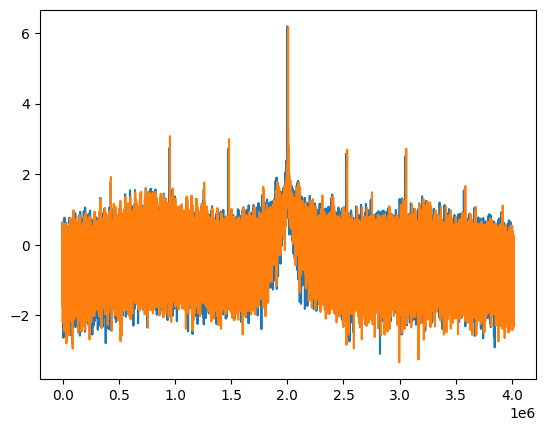

(0.5656218267861517-0.9967597796172377j)
(array([ 952029,  952032,  952035, ..., 3048032, 3048033, 3048034]),)


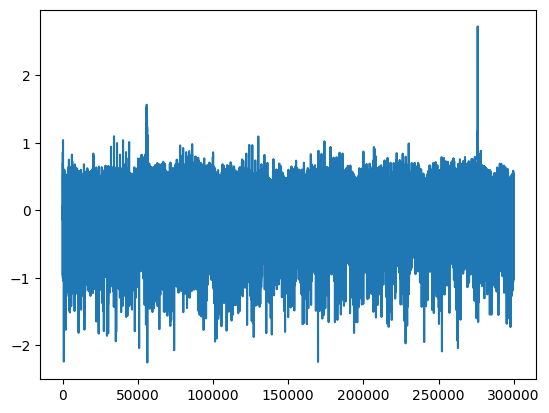

(array([276036, 276037, 276038, 276039, 276040]),)


In [24]:
examplefile = "/home/jshenoy2/ProjectEspana/feb_29/(180, 40)"
signal = read_complex_binary2(examplefile)
examplefile = "/home/jshenoy2/ProjectEspana/feb_29/(180, 60)"
signal2 = read_complex_binary2(examplefile)

np.fft.fftshift(np.fft.fft(signal))
np.fft.fftshift(np.fft.fft(signal2))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))
transformed_fft_sig2 = np.log10(np.fft.fftshift(np.fft.fft(signal2)))
plt.plot(transformed_fft_sig)
plt.plot(transformed_fft_sig2)
plt.show()
print(np.max(transformed_fft_sig[bin]))
indices_low = np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4))
print(np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4)))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))[1200000:1500000]
plt.plot(transformed_fft_sig)
plt.show()
print(np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4)))
#low_value = transformed_fft_sig[bin_value1]
#high_value = transformed_fft_sig[bin_value2]


/tmp/ipykernel_585380/3581978587.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  matrix[x][y] = high_value


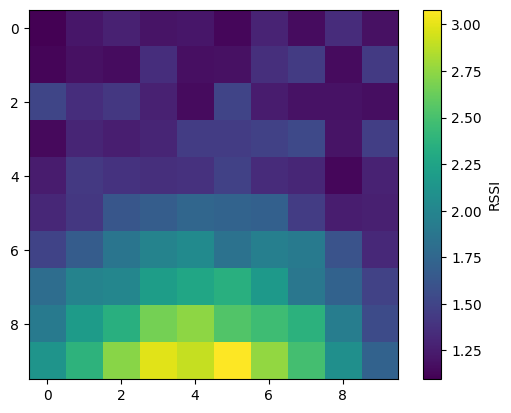

In [25]:
file_path = "/home/jshenoy2/ProjectEspana/feb_29/"
matrix  = np.zeros((10, 10))
for files in glob.glob(file_path+"*"):
    splitty = files.split("/")[-1]
    tup_split = make_tuple(splitty)
    x = int(tup_split[0]/20)
    y = int(tup_split[1]/20)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))
    #low_value = transformed_fft_sig[bin_value1]
    high_value = transformed_fft_sig[1200000:1500000]
    high_value = np.max(high_value)
    matrix[x][y] = high_value

plt.imshow(matrix)
plt.colorbar(label="RSSI", orientation="vertical")



Mesh Plot

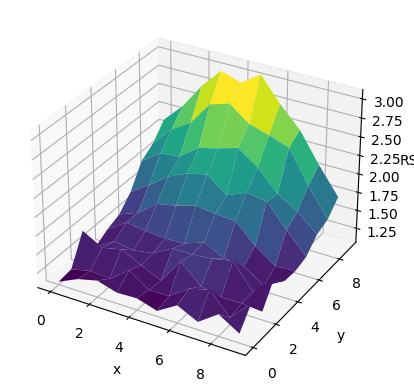

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(0,10,1)
y = np.arange(0,10,1)
X, Y = np.meshgrid(x, y)
Z = matrix
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI');

Plot Simulation


In [ ]:
np.load(filed)